# Reference links
**Lecture videos**
Naive Bayes intro (@1:59:00): https://www.scaler.com/meetings/i/dsml-advanced-svm-2-2/archive


# Content
1. Introduction
2. Understanding the data
3. Mathematical intuition
 - Calculating class priors
 - Naive assumption
 - Calculating likelihoods
 - Final equation

# Introduction
Till now we have seen how our features have been **numeric** or **categorical features.**

But what if now we have **text/sentences** as our features and we want to predict something out of it.

Let us give examples of where Naive Bayes is used in the real world



### Spam Classification
Everybody knows about the spam folder in email inboxes. We can easily predict if a email is spam or not based on presence of certain words like <br>
"Nigerian prince", "lottery", "million dollars", ... etc

A spam message classification is a step towards building a tool for scam message identification and early scam detection.

### Sentiment Analysis
Suppose you are not given the star ratings and you want to find out whether the given review is positive or negative in sentiment.

The moment we see certain words, we can make a good guess of the sentiment of the reviews like:- <br>
"bad", "terrible", "pathetic", ...etc  -->  Negative sentiment <br>
"good", "great", "handy", "useful", ...etc  -->  Positive sentiments


### Q. What can you say about the nature of these problems?
Both these problems we discussed are **simple** tasks of the Natural Language Processing **(NLP)**.

Here in both the cases, we see how only a **few words** are required to find the **whole context** and predict something out it. This is a very basic task of a highly complicated topic NLP, which has its own State Of The Art models that are discussed in the later modules.

Other complex tasks in NLP include grammer mistake detection, translation, etc. We will cover them properly in our NLP module. For now let's take a look at Naive Bayes only.


## Understanding our spam classifier data
We are given 2 columns, one containing **text body (email)** and the other containing **spam labels (0 or 1)**

### Q. What do we understand by text?
- The text body of email is essentially a **sequence of words**. So, any text i, can be written as <br>
$ text_{i} = w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i $ <br>
where, d -> length of text (email) i.
- **Note:** The number of words in text1 **may or may not be equal** to the number of words in text2


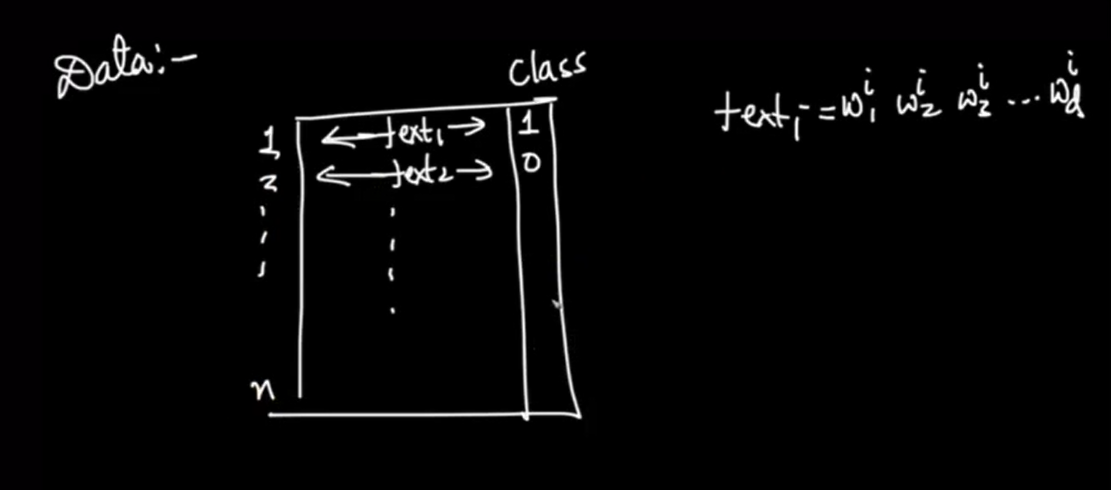

### Q. Now recall of how just a few words are enough to understand the entire context of given text, how can we find these keywords?

In NLP, typically what we do with text data is, we remove some words. These class of words are called as **stop words**, because these words do not matter much.



### Q. What are stop words?
- Stopwords are the words in any language which does not add much meaning to a sentence.
- They can **safely be ignored without sacrificing the meaning of the sentence**.
- These are some of the most common, short function words, such as the, is, at, which, and on.
-
They add no **real meaning** to our text as  they carry **very little** useful information.

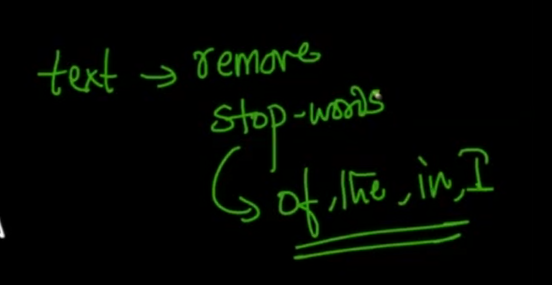

### Q. Why do we remove stop words?
- In this NLP task, i.e. spam classification (or even sentiment analysis), essentially what we need to do is look at all the words, and based on whether we find words that can positively indicate that the given email is a spam, we classify it as a spam.

- We don't have to make a complete grammatical sense out of our text, so we can remove words that add no real meaning, because otherwise, parsing through them is only making it more **computationally heavy**, for no reason.

- But there are tasks like translation, then we cannot remove stop words.

### Q. Wouldn't removing stop words lead to grammatical errors?
**Yes**. It will.

But since to understand context from keywords, grammer is not important hence we use stopwords removal technique

# Mathematical Intuition



Essentially, we wish to calculate that **given a text i, predict whether it is a spam (y=1) or not (y=0)**.

$ P(y=1|text) \ and \ P(y=0|text) $

Out of the two, Whichever value we find to be **higher**, we get our answer accordingly.


### Q. Can we write the probability we need to find, in another way (Mathematical Breakdown)?
- $ P_{i}(y=1|text_{i})$ can be written as $ P_{i}(y=1|w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i) $ <br>
where, i denotes the ith text (email)

- We can read this in English as, "Probability that text i is a spam given that words $w_{1}^i$ **AND** $w_{2}^i$ **AND** $w_{3}^i$ **AND**  ... **AND** $w_{d}^i$ exist in our text".


### Q. How do we compute this probability?
- Since this is conditional probability, perhaps we can apply Baye's theorm?
- Remember Baye's theorm? It's formula was:-<br>
$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$<br>
where, <br>
A, B	=	events<br>
P(A|B)	=	probability of A given B is true<br>
P(B|A)	=	probability of B given A is true<br>
P(A), P(B)	=	the independent probabilities of A and B<br>
- Let X be the event that words $w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i$ exist in our text.
- This means <br>
$ P_{i}(y=1|w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i) = P_{i}(y=1|X)$ <br>
According to Baye's theorm, we have, <br>
$P_{i}(y=1|X) = \frac{P(X|y=1)*P(y=1)}{P(X)} = \frac{P(X|y=1)*P(y=1)}{k}$
Let k = P(X) <br>

- Similarily, we get equation for P(y=0|X) as:- <br>
$P_{i}(y=0|X) = \frac{P(X|y=0)*P(y=0)}{P(X)} = \frac{P(X|y=0)*P(y=0)}{k}$

- Now, at the end of calculations, we know that we need to **compare values** of $P_{i}(y=1|X)$ and $P_{i}(y=0|X)$, so we can simply **cancel out the k** present in both these terms in the denominator.

- Thus we are left with $P_{i}(y=1|X) = P(X|y=1)*P(y=1)$ and $P_{i}(y=0|X) = P(X|y=0)*P(y=0)$ i.e. 4 terms of probabilities whose values we wish to find.

- Now, if we find these 4 values, we're done.


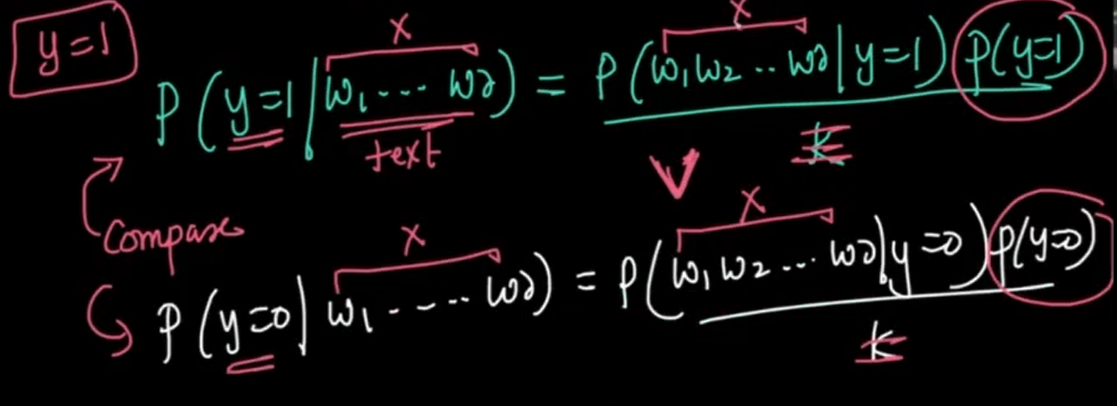

### Q. How can we get the values of P(y=1) and P(y=0) (i.e. the **class priors**)?
In our training data, we already have columns of labels (0s and 1s).

Using the number of occurences of 0 and 1, we can calculate P(y=0) and P(y=1).


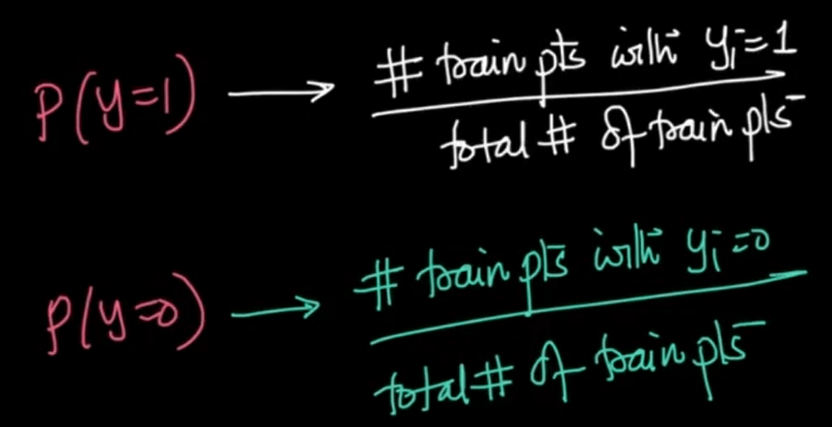

# Naive Assumption

### Q. What about the other two terms?
- Since they are similar, let's just consider $P(X|y=1)$
- If we were to say this is English, this term represents "The probability that y=1 i.e. email is a spam given that words $w_{1}^i$ **and** $w_{2}^i$ **and** $w_{3}^i$ **and** ... **and** $w_{d}^i$ exist in the text i (ith email).
- This looks cumbersome to calculate, since this means, we have to look at **all the texts**, in which **all these d words** occurs.
- Firstly, this becomes expensive to calculate. Secondly, this value would practically be so small, that it is not of any use to us.
- This doesn't make logical sense to calculate, so what "Math guys" have done is, they said lets be **Naive** (simplsistic) about this.
 - Lets make a very simplified (naive) assumption that "the events of occurence of words $w_{1}^i, w_{2}^i, w_{3}^i, ..., w_{d}^i$ is **independant** of each other, but **conditioned on the class** (i.e. whether y=1 or y=0)".
 - From interview standpoint, a mistake that people make is that, they forget that in our naive assumption, this independance of occurence of words, is **"conditioned on the class"**. It is not the regular probability that is independant, rather it is the **conditional probability** that is independant.


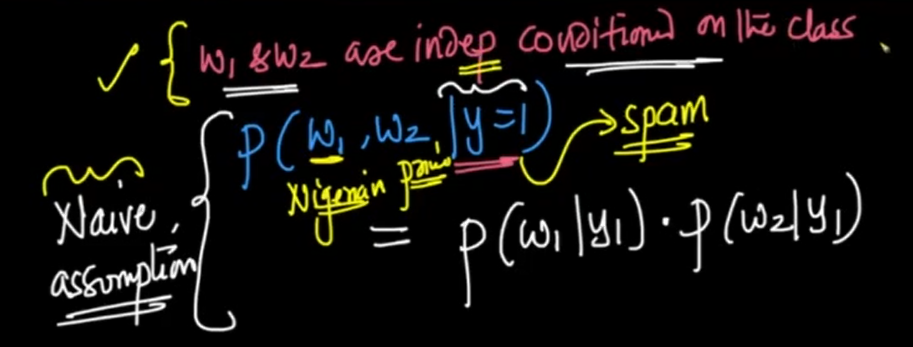

- This is a naive assumption because it may not always be true, but its a reasonable assumption to make.
 - For instance, is the probability of the words "Nigerian" and "Prince" actually independant?
 - No. But most words are independant.
 - Using this assumption, we make the math work.
- So using this assumption and the property of conditional independance, we get the following.

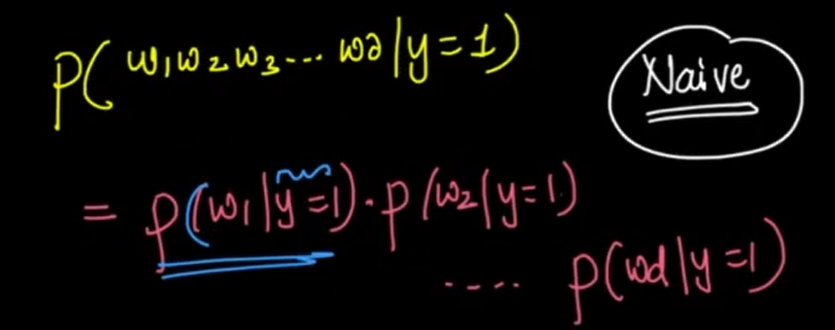

- In order to compute these terms, say $P(w_{1}|y=1)$,
 - we go through our all the texts (emails) that are spam (where y=1), and
 - we find the number of these texts where the word **w<sub>1</sub>** exists.   
 - Let this value be $n_{1}'$.
 - So, our value becomes $P(w_{1}|y=1) = n_{1}'/n_{1}$ where n<sub>1</sub> is the number of emails that are spam.

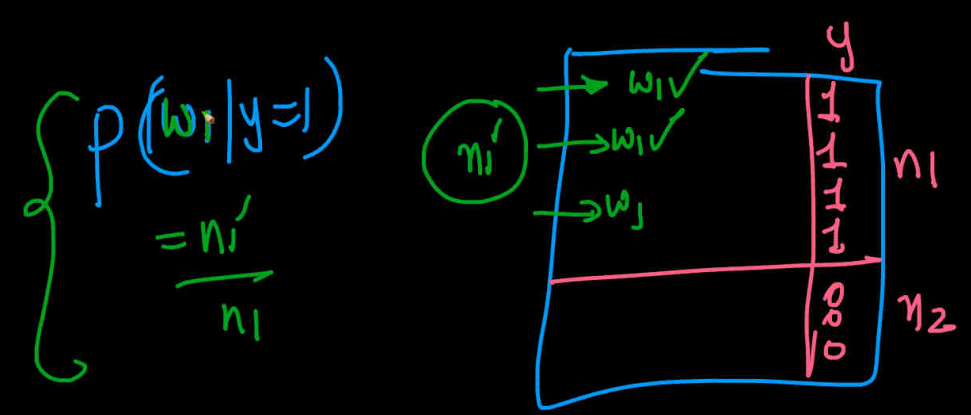

- So, our full equation becomes:-

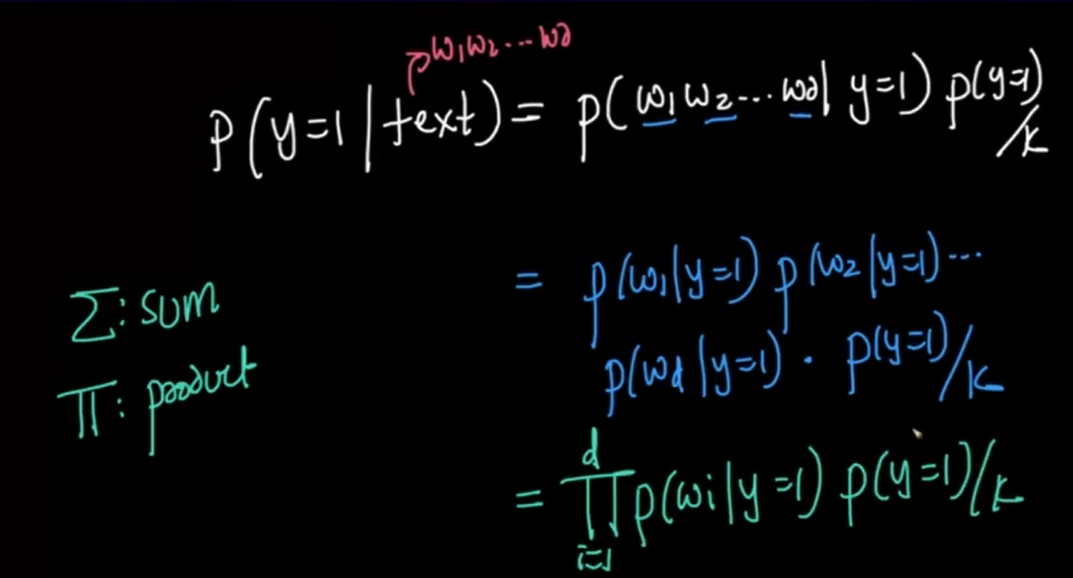

Similarily, we can get the other term also as:-

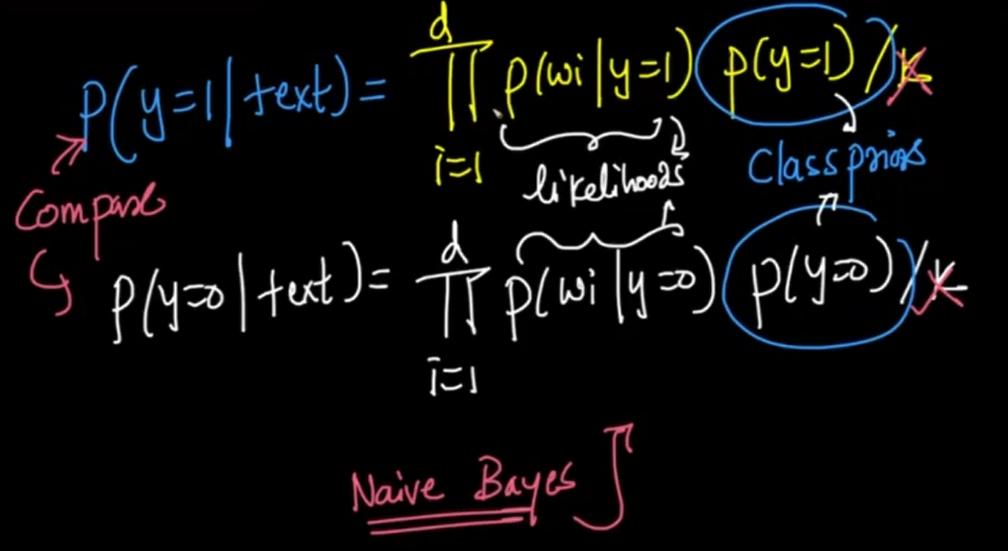

**Note:**
 - The terms $P(y=1)$ and $P(y=0)$ are called **class priors**
 - The terms $P(w_{i}|y=1)$ and $P(w_{i}|y=0)$ are called **likelihoods**. Likelihood is the probability of occurence of each word, conditioned on the class.

We finally have all the 4 terms we needed!

**We used a Naive assumption along with Baye's theorm, hence we get the name Naive Bayes for this algorithm!**



### Q. Why Naive Bayes?
If our task is a simple classification task with natural language text, Naive Bayes is a very popular model. This is so because:-
- **Simple**
 - As opposed to state of the art technology for NLP, **transformers**
 - Transformers are crazy complex
 - Just making sure they are working fine is a big challenge.
- **Super Fast**
- **Works really well**
 - For simple NLP tasks.
 - Fetches about 97-98% accuracy, whereas state of the art methods would fectch about 98.5% or so accuracy.
- **Interpretable**
 - A smart and interpretable model that works really well for simlpe tasks.
 - Favourite choice among programmers



### Q. Can anyone tell if and when will this mathematical intuition breakdown?
- **Class Imbalance**
 - We will learn to fix this later.

- More fundamentally, **what if the word doesn't occur in text?**
 - then the probability becomes zero.
 - Suppose, the training data has a word, but the testing data doesn't have that word.
 - The final probability would become zero this way!
 - We will learn to fix this too, using techniques like **Laplace smoothing**.
- **Underflow**
 - If we multiply a lot of probabilities (values between 0 and 1), the product can become so small, that we get what is known as underflow.